In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import math
import numpy as np
from scipy.stats import spearmanr

from allensdk.core.cell_types_cache import CellTypesCache
from allensdk.api.queries.cell_types_api import CellTypesApi

In [2]:
#csv file of all electrophysiology, morphology features, ion conductance, nm_id
all_features = pd.read_csv("C:/Users/Allose/Notebook/all_features.csv", index_col=0)
#csv file of all electrophysiology, morphology features, ion conductance, nm_id, including cell type
all_features_cell_type = pd.read_csv("C:/Users/Allose/Notebook/all_features_cell_type.csv", index_col=0)

#transcriptomic gene expression data by cell type
transcriptome_df = pd.read_csv("C:/Users/Allose/Notebook/transcriptome_df.csv", index_col=0)
#transcriptomic gene expressions data with all separate cortical layers
new_transcriptome_df = pd.read_csv('C:/Users/Allose/Notebook/sep_layer_df.csv', index_col=0)
#transcriptomic gene expression data with only cre-line
new_label_df = pd.read_csv("C:/Users/Allose/Notebook/new_label_transcriptome_df.csv", index_col=0)

#relavtive ion conductance data for only cre-lines
cre_parameter_df = pd.read_csv("C:/Users/Allose/Notebook/cre_parameter_df.csv", index_col=0)
#absolute ion conductance data for cell types
abs_parameter_df = pd.read_csv("C:/Users/Allose/Notebook/abs_parameter_df.csv", index_col=0)
#relative conductance data for cell types
sep_layer_cre_parameter_df = pd.read_csv('sep_layer_cre_parameter_df.csv', index_col=0)

#csv for entrenz symbol and associated gene
entrenz_symbol_s = pd.Series.from_csv("C:/Users/Allose/Notebook/entrenz_symbol_s.csv", index_col=0)

#csv file about channel genes and their associated ion channels
ion_channel_genes = pd.read_csv("C:/Users/Allose/Notebook/targets_and_families.csv", index_col=0)

#Spearman Correlation ranks at cre-line level
f = open("new_spearman_corr_ranks.json","r")
data = json.load(f)
spearman_corr_ranks = data
f.close()

#Spearman Correlation ranks for cell types and relative conductance
f = open("sep_spearman_corr_ranks.json","r")
data = json.load(f)
sep_spearman_corr_ranks = data
f.close()

#Spearman Correlation ranks for cell types and absolute conductance
f = open("abs_spearman_corr_ranks.json","r")
data = json.load(f)
abs_spearman_corr_ranks = data
f.close()



sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

#Parameter names
parameters = ['gbar_Im',
              'gbar_Ih',
              'gbar_NaTs',
              'gbar_Nap',
              'gbar_K_P',
              'gbar_K_T',
              'gbar_SK',
              'gbar_Kv3_1',
              'gbar_Ca_HVA',
              'gbar_Ca_LVA',
              'gamma_CaDynamics',
              'decay_CaDynamics',
              'soma_g_pas',
              'axon_g_pas',
              'dend_g_pas',
              'apic_g_pas',
              'gbar_NaV',
              'gbar_Kd',
              'gbar_Kv2like',
              'gbar_Im_v2']

#Parameter names for absolute conductance
abs_parameters = ['abs_gbar_Im',
 'abs_gbar_Ih',
 'abs_gbar_NaTs',
 'abs_gbar_Nap',
 'abs_gbar_K_P',
 'abs_gbar_K_T',
 'abs_gbar_SK',
 'abs_gbar_Kv3_1',
 'abs_gbar_Ca_HVA',
 'abs_gbar_Ca_LVA',
 'abs_gamma_CaDynamics',
 'abs_decay_CaDynamics',
 'abs_soma_g_pas',
 'abs_axon_g_pas',
 'abs_dend_g_pas',
 'abs_apic_g_pas',
 'abs_gbar_NaV',
 'abs_gbar_Kd',
 'abs_gbar_Kv2like',
 'abs_gbar_Im_v2']

#6 Parameters shared by all neuronal models
shared_parameters = ['gbar_Ih', 'gbar_K_T', 'gbar_SK', 'gbar_Kv3_1', 'gbar_Ca_HVA', 'gbar_Ca_LVA']

#List of gene channels that are voltage gated
ion_channel_genes = ion_channel_genes[ion_channel_genes['MGI symbol'].notnull()]
gene_channel = ion_channel_genes.loc["vgic"]
gene_channel = gene_channel['MGI symbol'].values
gene_channel = list(gene_channel)

C:\Users\Allose\Anaconda3\lib\site-packages\pandas\core\series.py:3727: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


In [4]:
#Set-up for palette for cell types based on Cre-line
cre_color = ['Gad2-IRES-Cre__L5__inh',
             'Htr3a-Cre_NO152__L2/3__inh',
             'Htr3a-Cre_NO152__L4__inh',
             'Htr3a-Cre_NO152__L5__inh',
             'Htr3a-Cre_NO152__L5-L6__exc',
             'Nr5a1-Cre__L4__exc',
             'Ntsr1-Cre_GN220__L6__exc',
             'Pvalb-IRES-Cre__L2/3__inh',
             'Pvalb-IRES-Cre__L4__inh',
             'Pvalb-IRES-Cre__L5__inh',
             'Pvalb-IRES-Cre__L6__inh',
             'Rbp4-Cre_KL100__L4__exc',
             'Rbp4-Cre_KL100__L5__exc',
             'Scnn1a-Tg2-Cre__L4__exc',
             'Scnn1a-Tg3-Cre__L2/3-L4__exc',
             'Sst-IRES-Cre__L1-L2/3__inh',
             'Sst-IRES-Cre__L4__inh',
             'Sst-IRES-Cre__L5__inh',
             'Sst-IRES-Cre__L6__inh']

cre_line_palette = {'Gad2-IRES-Cre__L5__inh':"#D98463", 
                    'Htr3a-Cre_NO152__L2/3__inh':"#DF6BC6", 
                    'Htr3a-Cre_NO152__L4__inh':"#DF6BC6", 
                    'Htr3a-Cre_NO152__L5__inh':"#DF6BC6", 
                    'Htr3a-Cre_NO152__L5-L6__exc':"#DF6BC6", 
                    'Nr5a1-Cre__L4__exc':"#43BCA9",
                    'Ntsr1-Cre_GN220__L6__exc':"#70849A",
                    'Pvalb-IRES-Cre__L2/3__inh':"#CD3449",
                    'Pvalb-IRES-Cre__L4__inh':"#CD3449",
                    'Pvalb-IRES-Cre__L5__inh':"#CD3449",
                    'Pvalb-IRES-Cre__L6__inh':"#CD3449",
                    'Rbp4-Cre_KL100__L4__exc':"#009B81",
                    'Rbp4-Cre_KL100__L5__exc':"#009B81",
                    'Scnn1a-Tg2-Cre__L4__exc':"#59B7B4",
                    'Scnn1a-Tg3-Cre__L2/3-L4__exc':"#65AA8A",
                    'Sst-IRES-Cre__L1-L2/3__inh':"#B35F1F",
                    'Sst-IRES-Cre__L4__inh':"#B35F1F",
                    'Sst-IRES-Cre__L5__inh':"#B35F1F",
                    'Sst-IRES-Cre__L6__inh':"#B35F1F"}

In [5]:
#Graphing scatterplot of conductance and transcriptomics
def graph_conductance_exp(parameter_type, gene_symbol, df):
    cre_parameter_df_spec = df[[parameter_type]]
    cre_conductance_filtered = cre_parameter_df_spec[cre_parameter_df_spec[parameter_type].notna()]
    filtered_cre = list(cre_conductance_filtered.index)
    
    gene_id = entrenz_symbol_s[entrenz_symbol_s == gene_symbol].index[0]
    gene_spec = transcriptome_df.loc[gene_id]
    gene_spec_filtered = pd.DataFrame(gene_spec.loc[filtered_cre])
    
    graph_spec = pd.concat([cre_conductance_filtered, gene_spec_filtered], axis = 1)
    plt.figure(figsize=(8, 8))
    plt.title('Correspondence of {} relative conductance \n and {} gene expression by Cre driver line'.format(parameter_type, gene_symbol))
    
    
    ax = sns.scatterplot(x=gene_id, y=parameter_type, hue=cre_color, data=graph_spec, s = 100, palette=cre_line_palette)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Cre Driver Lines")

    ax.set(xlabel='{} Transcriptomic Gene Expression'.format(gene_symbol), ylabel='{} Conductance'.format(parameter_type))

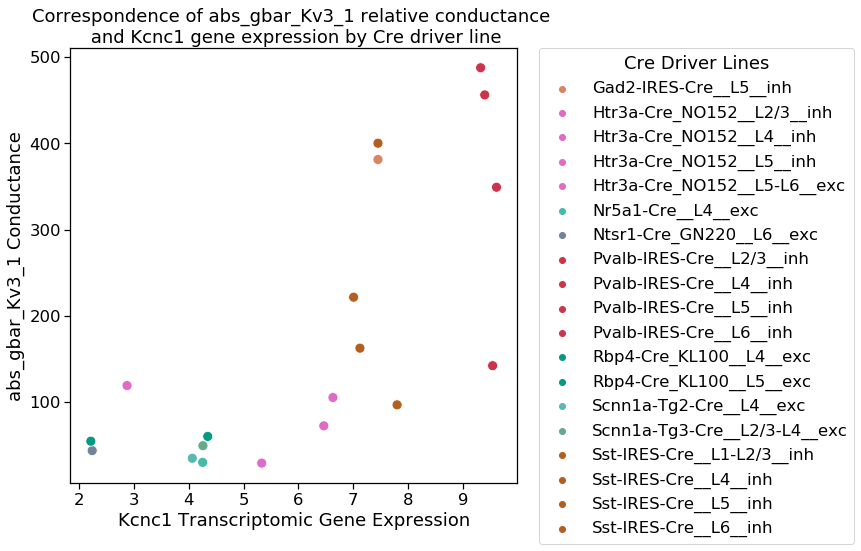

In [6]:
#Example of graph_conductance_exp function
graph_conductance_exp('abs_gbar_Kv3_1', 'Kcnc1', abs_parameter_df)

In [7]:
#Creating matrix for conductance parameter and gene expression to be compared for Spearman correlation
def create_corr(parameter_type, gene_symbol, df):
    cre_parameter_df_spec = df[[parameter_type]]
    cre_conductance_filtered = cre_parameter_df_spec[cre_parameter_df_spec[parameter_type].notna()]
    filtered_cre = list(cre_conductance_filtered.index)
    
    gene_id = entrenz_symbol_s[entrenz_symbol_s == gene_symbol].index[0]
    gene_spec = transcriptome_df.loc[gene_id]
    gene_spec_filtered = pd.DataFrame(gene_spec.loc[filtered_cre])
    
    graph_spec = pd.concat([cre_conductance_filtered, gene_spec_filtered], axis = 1)
    return graph_spec

In [8]:
#Returns rho value (spearman) and pval (p-value)
def spearman_conductance_exp(parameter_type, gene_symbol, df):
    graph_spec = create_corr(parameter_type, gene_symbol, df)

    spearman_val = graph_spec.corr(method="spearman").iloc[0, 1]
    return spearmanr(graph_spec)

In [12]:
#Example of spearman_conductance_exp
spearman_conductance_exp('gbar_SK', 'Kcnn2', sep_layer_cre_parameter_df)


SpearmanrResult(correlation=0.487719298245614, pvalue=0.03415056320296079)

In [5]:
#Creating a rank for a specific parameter for all available transcriptomics
def create_matrix(parameter, abs_spearman_dict):
    d = {"symbol": list(abs_spearman_dict[parameter].keys()), "correlation": list(abs_spearman_dict[parameter].values())}
    test = pd.DataFrame(d)
    return test.sort_values(by=['correlation'])

In [11]:
#Example of create_matrix
create_matrix('abs_gbar_Ih', abs_spearman_corr_ranks)

,symbol,correlation
2569,Dalrd3,-0.745614
3393,Fam133b,-0.650877
8946,Rnd3,-0.592982
3581,Fbxo8,-0.577193
1480,Brwd3,-0.564912
5836,LOC102634709,-0.556140
5402,Inadl,-0.519298
11895,Zfp273,-0.519298
3903,Ggnbp2os,-0.517544
1708,Ccdc157,-0.514035


In [12]:
#Ranking conductance parameter gene transcript pairing for voltage gated ion channels
def channel_ranks(parameter, df):
    test = create_matrix(parameter, df)
    sorted_test = test.sort_values(["correlation"], ascending=False)
    for index, row in sorted_test.iterrows():
        if row['symbol'] in gene_channel:
            print(row['symbol'] + " : " + str(row['correlation']))

In [13]:
#Ranking for absolute conductance
for parameter in shared_parameters:
    new_par = 'abs_' + parameter
    
    print(new_par)
    channel_ranks(new_par, abs_spearman_corr_ranks)

abs_gbar_Ih
Trpm2 : 0.30701754385964913
Kcnt1 : 0.2894736842105263
Tpcn1 : 0.2824561403508772
Kcnn2 : 0.2631578947368421
Hcn1 : 0.23157894736842105
Kcna3 : 0.21754385964912282
Kcnj4 : 0.19473684210526315
Kcnn3 : 0.18596491228070175
Hcn2 : 0.16666666666666666
Scn9a : 0.16666666666666666
Hcn3 : 0.156140350877193
Trpc6 : 0.14216763106221753
Trpm4 : 0.13333333333333333
Kcns3 : 0.12478050904927618
Scn1a : 0.12280701754385964
Kcng2 : 0.11929824561403508
Trpc3 : 0.11759544791566143
Mcoln1 : 0.11052631578947368
Kcnn1 : 0.10526315789473684
Trpc4 : 0.10526315789473684
Cacna1b : 0.10350877192982456
Kcnq5 : 0.10175438596491228
Cnga4 : 0.07894736842105263
Kcnj12 : 0.07192982456140351
Kcnb2 : 0.06491228070175438
Kcnj6 : 0.056140350877192984
Kcnu1 : 0.056140350877192984
Cacna1a : 0.054385964912280704
Kcnt2 : 0.04912280701754386
Kcna1 : 0.0456140350877193
Kcnh2 : 0.0456140350877193
Kcnk9 : 0.03866438308569121
Kcna2 : 0.03333333333333333
Cacna1d : 0.02982456140350877
Pkd2 : 0.02982456140350877
Kcns1 : 

Kcnf1 : -0.32105263157894737
Kcnn2 : -0.3298245614035088
Kcnma1 : -0.3333333333333333
Ryr2 : -0.3333333333333333
Kcnk2 : -0.35789473684210527
Ryr3 : -0.38596491228070173
Cacna1g : -0.3912280701754386
Kcnb2 : -0.39824561403508774
Kcnk10 : -0.42299258130857315
Kcnb1 : -0.4298245614035088
Kcnc4 : -0.4543859649122807
Kcnn3 : -0.46842105263157896
Kcnj6 : -0.48596491228070177
Kcnq5 : -0.4964912280701754
Kcnk4 : -0.5017543859649123
Trpm3 : -0.5210526315789473
Cacna1e : -0.5649122807017544
Kcnk9 : -0.5729358584516061
Kcnv1 : -0.5894736842105263
Kcnh3 : -0.6280701754385964
Kcns2 : -0.6333333333333333
Scn3a : -0.6877192982456141
Kcna4 : -0.7105263157894737
Kcnj2 : -0.8328214930743484
Kcnt2 : -0.8614035087719298
abs_gbar_Ca_HVA
Kcnq3 : 0.4017543859649123
Kcnc2 : 0.3894736842105263
Kcna2 : 0.387719298245614
Kcnd2 : 0.3736842105263158
Kcnk2 : 0.33157894736842103
Scn1a : 0.3263157894736842
Kcnk12 : 0.3087719298245614
Kcnh5 : 0.30013166557579257
Kcnc3 : 0.28771929824561404
Cacna1a : 0.266666666666666

In [14]:
#Ranking for relative conductance
for parameter in shared_parameters:

    print(parameter)
    channel_ranks(parameter, sep_spearman_corr_ranks)

gbar_Ih
Tpcn1 : 0.30350877192982456
Kcnn3 : 0.2596491228070175
Trpm2 : 0.24561403508771928
Kcnn2 : 0.24210526315789474
Trpc3 : 0.2246599601970845
Kcnq5 : 0.21052631578947367
Kcnb2 : 0.20701754385964913
Cacna1b : 0.19298245614035087
Kcnj4 : 0.16666666666666666
Kcnj12 : 0.1649122807017544
Cacna1a : 0.1631578947368421
Scn9a : 0.15087719298245614
Kcnt2 : 0.14912280701754385
Kcnt1 : 0.14035087719298245
Kcnh3 : 0.1368421052631579
Kcnh5 : 0.13251427339749908
Scn8a : 0.12631578947368421
Kcnj2 : 0.11496271400710184
Kcns1 : 0.11247820534019261
Cacna1g : 0.10526315789473684
Kcnj6 : 0.10175438596491228
Kcnk10 : 0.10092146649478405
Kcnk9 : 0.08963106988046599
Cacna1d : 0.08947368421052632
Hcn3 : 0.08947368421052632
Trpc6 : 0.08073717319582724
Kcnc3 : 0.07894736842105263
Kcna3 : 0.07543859649122807
Hcn1 : 0.07368421052631578
Kcnma1 : 0.06842105263157895
Scn1a : 0.06491228070175438
Kcnj11 : 0.06315789473684211
Kcns3 : 0.059754046586977326
Kcnq3 : 0.0456140350877193
Kcna2 : 0.0456140350877193
Hcn2 : 0

Tpcn1 : 0.06315789473684211
Scn9a : 0.06140350877192982
Kcnh3 : 0.06140350877192982
Kcna4 : 0.054385964912280704
Kcnj3 : 0.03508771929824561
Kcns3 : 0.03339196721036968
Trpm4 : 0.02280701754385965
Hcn2 : 0.02280701754385965
Kcnk9 : 0.019332191542845604
Pkd2 : 0.017543859649122806
Trpc3 : 0.005265467817119168
Kcnh7 : -0.005263157894736842
Kcna6 : -0.012280701754385965
Kcnq5 : -0.01929824561403509
Kcnf1 : -0.021052631578947368
Kcnj6 : -0.021052631578947368
Kcnk1 : -0.02631578947368421
Trpm2 : -0.03333333333333333
Kcnj2 : -0.03334796284175473
Kcns2 : -0.04035087719298246
Kcna1 : -0.04912280701754386
Trpm7 : -0.05964912280701754
Kcnk3 : -0.05964912280701754
Trpc6 : -0.08073717319582724
Trpc4 : -0.08596491228070176
Kcnn1 : -0.09473684210526316
Mcoln1 : -0.09824561403508772
Kcnh6 : -0.10877192982456141
Ryr3 : -0.11228070175438597
Kcnt2 : -0.14035087719298245
Cacna1d : -0.15789473684210525
Kcnj12 : -0.20526315789473684
Cnga4 : -0.22280701754385965
Hcn1 : -0.23684210526315788
Kcnt1 : -0.336842

In [3]:
#Histogram of spread of correlation value of each parameter
def histo_corr(parameter, df):
    test = create_matrix(parameter, df)
    sorted_test = test.sort_values(["correlation"], ascending=False)
    listof = []
    for index, row in sorted_test.iterrows():
        if row['symbol'] in gene_channel:
            listof.append(row['correlation'])
    plt.figure(figsize=(8, 8))
    ax = sns.distplot(listof, bins=len(listof))

In [4]:
#Example of Histogram for absolute conductance
histo_corr('abs_gbar_Kv3_1', abs_spearman_corr_ranks)

NameError: name 'create_matrix' is not defined

C:\Users\Allose\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


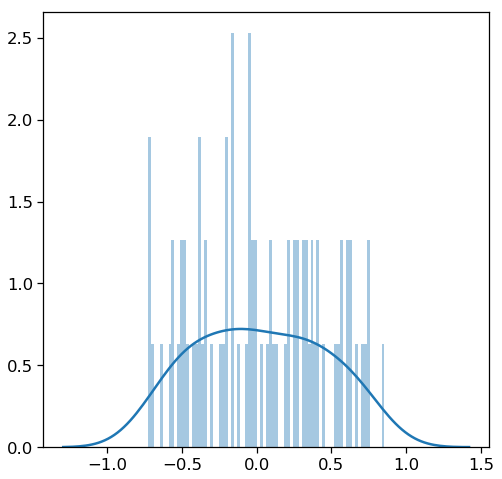

In [7]:
#Example of histogram for relative conductance
histo_corr('gbar_K_T', sep_spearman_corr_ranks)